In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math


## rotate around axis (x, y, z) by angle theta (degree)
def getQuaternion(x, y, z, theta):
    ## Step 1. Normalization
    norm = math.sqrt(x*x + y*y + z*z)
    x /= norm
    y /= norm
    z /= norm

    ## Step 2. Generate quaternion for rotation
    q0 = math.cos(math.radians(theta*0.5))
    q1 = x * math.sin(math.radians(theta*0.5))
    q2 = y * math.sin(math.radians(theta*0.5))
    q3 = z * math.sin(math.radians(theta*0.5))

    return np.array([q0, q1, q2, q3])

## Returns the rotation of a vector by a given quaternion.
# input quat and vec are arrays of four numbers: [q0, q1, q2, q3]
def quatVec(quat, vec):
    v0 = (pow(quat[0],2) + pow(quat[1],2) - pow(quat[2],2) - pow(quat[3],2))*vec[0] \
            + (2.*quat[1]*quat[2]-2.*quat[0]*quat[3])*vec[1] + (2.*quat[3]*quat[1]+2.*quat[0]*quat[2])*vec[2]

    v1 = (2.*quat[1]*quat[2]+2.*quat[0]*quat[3])*vec[0] + (pow(quat[0],2)-pow(quat[1],2)+pow(quat[2],2)-pow(quat[3],2))*vec[1] \
            + (2.*quat[2]*quat[3]-2.*quat[0]*quat[1])*vec[2]

    v2 = (2.*quat[1]*quat[3]-2.*quat[0]*quat[2])*vec[0] + (2.*quat[0]*quat[1]+2.*quat[2]*quat[3])*vec[1] \
            + (pow(quat[0],2) - pow(quat[1],2) - pow(quat[2],2) + pow(quat[3],2))*vec[2]

    return np.array([v0, v1, v2])


## Rotates a list of vectors according to the quaternion quat
# input quat and vec are arrays of four numbers: [q0, q1, q2, q3]
def rotateFrame(quat, veclist):
    vecarr=np.asarray(veclist)
    new_veclist=[]

    for vec in vecarr:
        newvec = quatVec(quat, vec)
        new_veclist.append(newvec)

    new_veclist=np.asarray(new_veclist)

    return new_veclist


## Returns the product of two quaternions.
# input quats are arrays of four numbers: [q0, q1, q2, q3]
def quatMultiply(quatA, quatB):
    # quaternion scalar
    qAs = quatA[0]
    # quaternion vector
    qAv = np.array([quatA[1], quatA[2], quatA[3]])
    # quaternion scalar
    qBs = quatB[0]
    # quaternion vector
    qBv = np.array([quatB[1], quatB[2], quatB[3]])

    # product scalar and vector
    qABs = qAs*qBs - np.dot(qAv, qBv)
    qABv = qAs*qBv + qBs*qAv + np.cross(qAv, qBv)

    return np.array([qABs, qABv[0], qABv[1], qABv[2]])


[0.8660254 0.        0.        0.5      ]


(-5.0, 5.0)

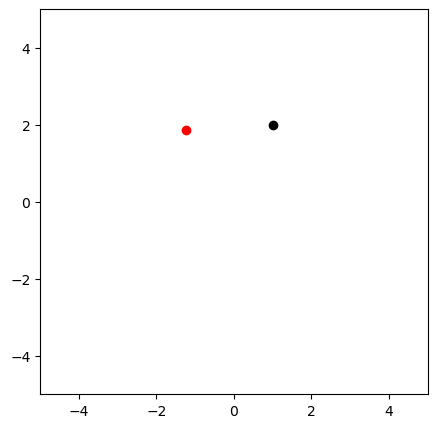

In [12]:
## Task 1. Rotate a vector

v1 = [1,2,0]

# define a quaternion
rot_axis = [0,0,1] 
rot_angle = 60
q1 = getQuaternion(rot_axis[0],rot_axis[1],rot_axis[2],rot_angle)
print(q1)

# rotate v1
rot_v1 = quatVec(q1,v1)

plt.figure(figsize=(5,5))
plt.plot([v1[0]],[v1[1]],'o',color='black')
plt.plot([rot_v1[0]],[rot_v1[1]],'o',color='red')
plt.xlim(-5,5)
plt.ylim(-5,5)


[ 0.96592583 -0.         -0.         -0.25881905]


(-5.0, 5.0)

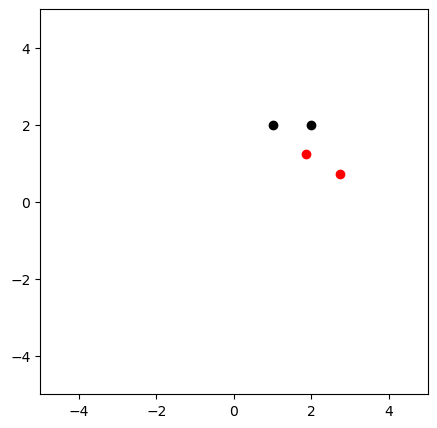

In [23]:
## Task 2. Rotate a group of vectors

v2 = np.array([[1,2,0],[2,2,0]])

# define a quaternion
rot_axis = [0,0,1] 
rot_angle = -30
q1 = getQuaternion(rot_axis[0],rot_axis[1],rot_axis[2],rot_angle)
print(q1)

rot_v2 = rotateFrame(q1,v2)


plt.figure(figsize=(5,5))
plt.plot([v2[:,0]],[v2[:,1]],'o',color='black')
plt.plot([rot_v2[:,0]],[rot_v2[:,1]],'o',color='red')
plt.xlim(-5,5)
plt.ylim(-5,5)



[ 0.96592583 -0.         -0.         -0.25881905]
[ 0.25881905  0.          0.         -0.96592583]


(-5.0, 5.0)

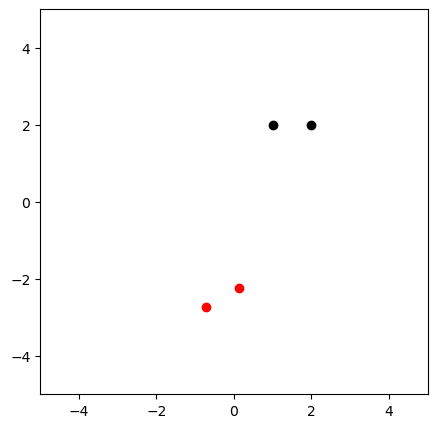

In [27]:
## Task 3. Rotate a group of vectors with two quaternions

v2 = np.array([[1,2,0],[2,2,0]])

# define a quaternion
rot_axis = [0,0,1] 
rot_angle = -30
q1 = getQuaternion(rot_axis[0],rot_axis[1],rot_axis[2],rot_angle)
print(q1)

rot_angle2 = -120
q2 = getQuaternion(rot_axis[0],rot_axis[1],rot_axis[2],rot_angle2)

q3 = quatMultiply(q1,q2)
print(q3)

rot_v2 = rotateFrame(q3,v2)


plt.figure(figsize=(5,5))
plt.plot([v2[:,0]],[v2[:,1]],'o',color='black')
plt.plot([rot_v2[:,0]],[rot_v2[:,1]],'o',color='red')
plt.xlim(-5,5)
plt.ylim(-5,5)


In [31]:

a = np.array([1,0,0])
b = np.array([0,1,0])
print(np.cross(b,a))


[ 0  0 -1]
